<a href="https://colab.research.google.com/github/AmindaUdayanga/Feature-Engineered-Rice-yield-Prediction-based-on-Weather-Data/blob/master/feature_engineered_Anuradhapura_total.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import numpy as np
import pandas as pd
from array import *
import math

##All datasets

In [4]:
df1 = pd.read_csv('/content/drive/MyDrive/ML_research/Am.csv')
dataset1="Anuradhapura maha kannaya"

In [5]:
df2 = pd.read_csv('/content/drive/MyDrive/ML_research/Ay.csv')
dataset2="Anuradhapura yala kannaya"

In [6]:
df3 = pd.read_csv('/content/drive/MyDrive/ML_research/Km.csv')
dataset3="Kurunegala maha kannaya"

In [7]:
df4 = pd.read_csv('/content/drive/MyDrive/ML_research/Ky.csv')
dataset4="Kurunegala yala kannaya"

In [8]:
df5 = pd.read_csv('/content/drive/MyDrive/ML_research/total datasets/Anuradhapura_total.csv')
dataset5="Anuradhapura full dataset"

In [9]:
df = df5
df

dataset=dataset5
print(df)


    year        X1         X2         X3         X4   X5  X6  X7  X8  X9  \
0   1982  412.1500  31.296769  33.744517  28.250000   70  37  17  73  51   
1   1983  613.0500  31.419266  34.601370  27.292000   43  68  13  72  51   
2   1984  367.6500  31.150382  33.730150  28.037500   61  49  13  78  45   
3   1985  503.3000  31.059063  33.907830  27.581667   77  30  17  72  52   
4   1986  295.3500  31.332796  33.763206  27.990476   78  35  11  63  61   
5   1987  500.5500  31.627509  33.809596  27.942857   61  55   7  72  51   
6   1988  508.8465  31.130494  33.782143  28.029708  102  14   8  72  52   
7   1989  550.4100  31.144239  33.769920  28.042391   90  20  14  70  53   
8   1990  555.6500  31.203888  33.917118  28.190323   85  22  17  68  55   
9   1991  452.3500  31.078533  34.094348  28.251250   75  28  21  66  57   
10  1992  406.1000  31.158680  33.420000  27.917376   83  15  25  71  52   
11  1993  743.3000  31.192561  33.788889  27.381481   73  23  27  71  52   
12  1994  40

##pre processing

In [10]:
#Delete row whose column value is equal to 0
df = df.drop(df.index[df['X2'] == 0])
df = df.drop(df.index[df['X3'] == 0])
df = df.drop(df.index[df['X4'] == 0])
df = df.drop(df.index[df['X10'] == 0])
df = df.drop(df.index[df['X11'] == 0])
df.size

import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import Lasso
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error
from sklearn.linear_model import Ridge
from sklearn.svm import SVR
from sklearn.linear_model import ElasticNet
from sklearn.neural_network import MLPRegressor
from sklearn import neighbors
from sklearn.ensemble import RandomForestRegressor
print(df)

    year        X1         X2         X3         X4   X5  X6  X7  X8  X9  \
0   1982  412.1500  31.296769  33.744517  28.250000   70  37  17  73  51   
1   1983  613.0500  31.419266  34.601370  27.292000   43  68  13  72  51   
2   1984  367.6500  31.150382  33.730150  28.037500   61  49  13  78  45   
3   1985  503.3000  31.059063  33.907830  27.581667   77  30  17  72  52   
4   1986  295.3500  31.332796  33.763206  27.990476   78  35  11  63  61   
5   1987  500.5500  31.627509  33.809596  27.942857   61  55   7  72  51   
6   1988  508.8465  31.130494  33.782143  28.029708  102  14   8  72  52   
7   1989  550.4100  31.144239  33.769920  28.042391   90  20  14  70  53   
8   1990  555.6500  31.203888  33.917118  28.190323   85  22  17  68  55   
9   1991  452.3500  31.078533  34.094348  28.251250   75  28  21  66  57   
10  1992  406.1000  31.158680  33.420000  27.917376   83  15  25  71  52   
11  1993  743.3000  31.192561  33.788889  27.381481   73  23  27  71  52   
12  1994  40

<Axes: >

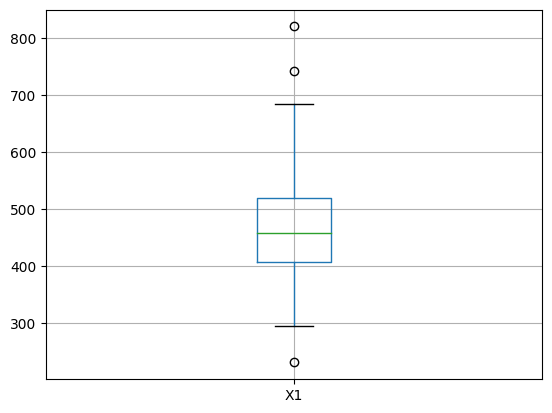

In [11]:
df.boxplot(column=['X1'])

<Axes: >

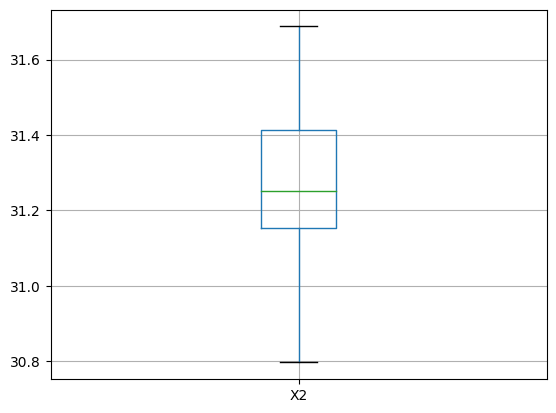

In [12]:
df.boxplot(column=['X2'])


<Axes: >

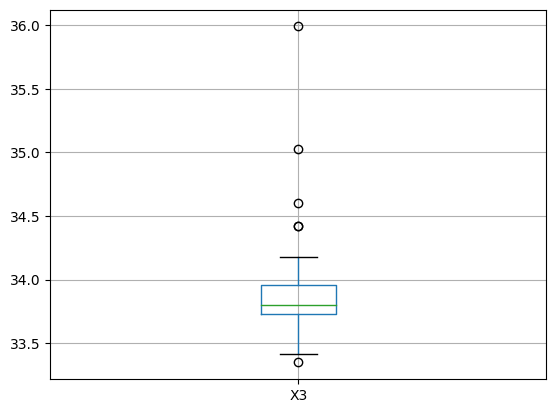

In [13]:
df.boxplot(column=['X3'])


<Axes: >

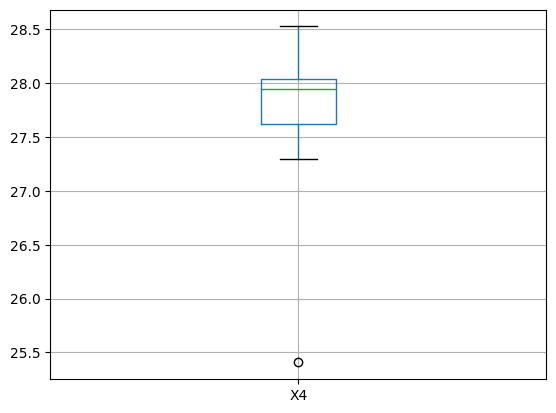

In [14]:
df.boxplot(column=['X4'])


<Axes: >

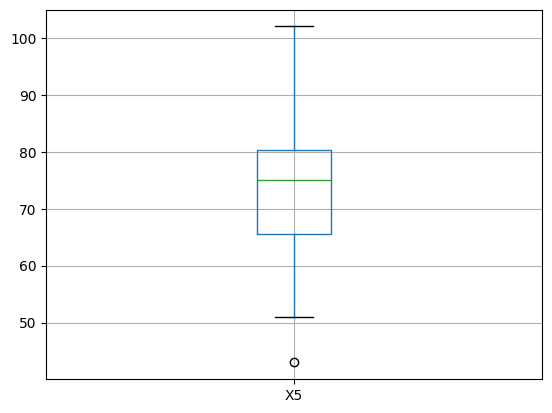

In [15]:
df.boxplot(column=['X5'])


<Axes: >

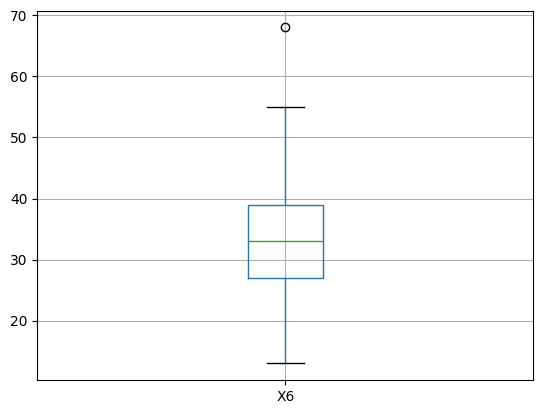

In [16]:
df.boxplot(column=['X6'])


<Axes: >

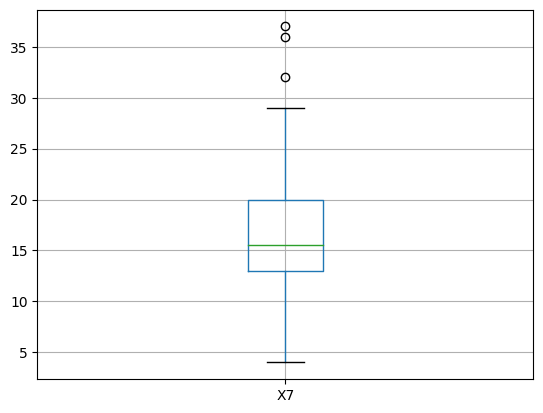

In [17]:
df.boxplot(column=['X7'])


<Axes: >

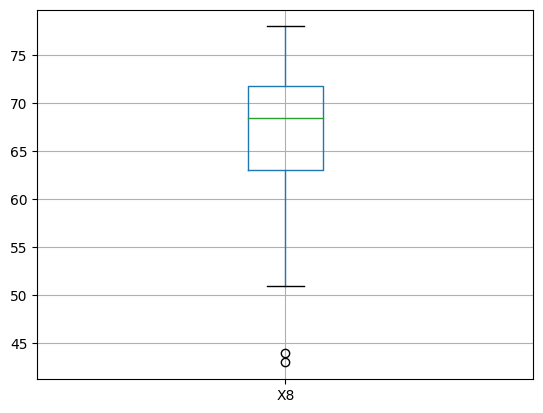

In [18]:
df.boxplot(column=['X8'])


<Axes: >

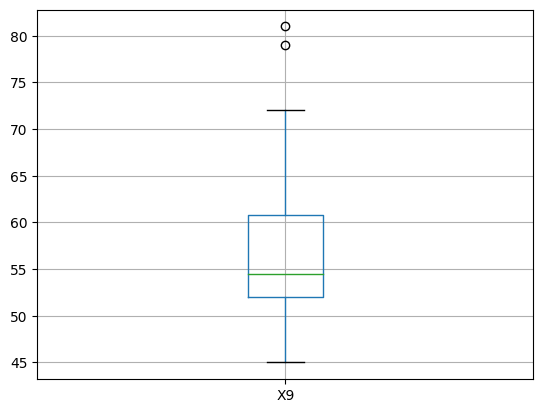

In [19]:
df.boxplot(column=['X9'])


<Axes: >

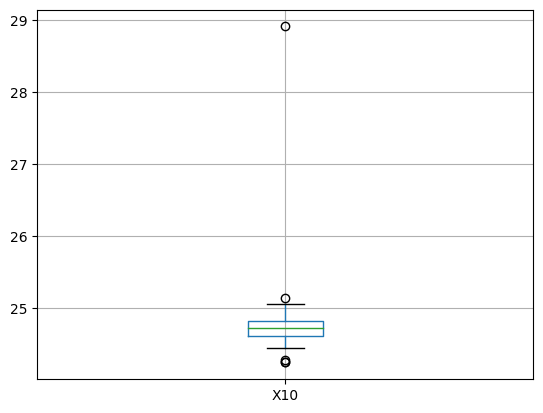

In [20]:
df.boxplot(column=['X10'])


<Axes: >

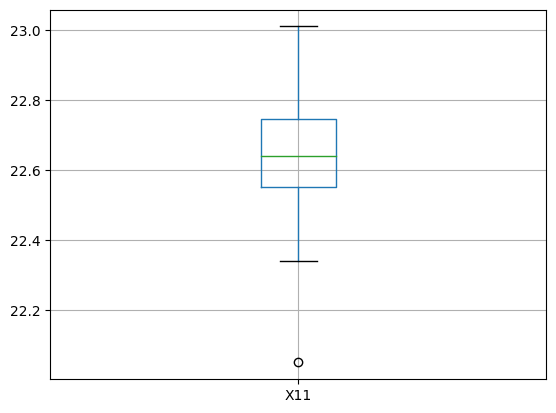

In [21]:
df.boxplot(column=['X11'])

In [22]:
df['X1'] = np.where(df['X1'] < (df['X1'].quantile(0.10)), (df['X1'].quantile(0.10)),df['X1'])
df['X1'] = np.where(df['X1'] >(df['X1'].quantile(0.90)), (df['X1'].quantile(0.90)),df['X1'])

df['X2'] = np.where(df['X2'] < (df['X2'].quantile(0.10)), (df['X2'].quantile(0.10)),df['X2'])
df['X2'] = np.where(df['X2'] >(df['X2'].quantile(0.90)), (df['X2'].quantile(0.90)),df['X2'])

df['X3'] = np.where(df['X3'] < (df['X3'].quantile(0.10)), (df['X3'].quantile(0.10)),df['X3'])
df['X3'] = np.where(df['X3'] >(df['X3'].quantile(0.90)), (df['X3'].quantile(0.90)),df['X3'])

df['X4'] = np.where(df['X4'] < (df['X4'].quantile(0.10)), (df['X4'].quantile(0.10)),df['X4'])
df['X4'] = np.where(df['X4'] >(df['X4'].quantile(0.90)), (df['X4'].quantile(0.90)),df['X4'])

df['X5'] = np.where(df['X5'] < (df['X5'].quantile(0.10)), (df['X5'].quantile(0.10)),df['X5'])
df['X5'] = np.where(df['X5'] >(df['X5'].quantile(0.90)), (df['X5'].quantile(0.90)),df['X5'])

df['X6'] = np.where(df['X6'] < (df['X6'].quantile(0.10)), (df['X6'].quantile(0.10)),df['X6'])
df['X6'] = np.where(df['X6'] >(df['X6'].quantile(0.90)), (df['X6'].quantile(0.90)),df['X6'])

df['X7'] = np.where(df['X7'] < (df['X7'].quantile(0.10)), (df['X7'].quantile(0.10)),df['X7'])
df['X7'] = np.where(df['X7'] >(df['X7'].quantile(0.90)), (df['X7'].quantile(0.90)),df['X7'])

df['X8'] = np.where(df['X8'] < (df['X8'].quantile(0.10)), (df['X8'].quantile(0.10)),df['X8'])
df['X8'] = np.where(df['X8'] >(df['X8'].quantile(0.90)), (df['X8'].quantile(0.90)),df['X8'])

df['X9'] = np.where(df['X9'] < (df['X9'].quantile(0.10)), (df['X9'].quantile(0.10)),df['X9'])
df['X9'] = np.where(df['X9'] >(df['X9'].quantile(0.90)), (df['X9'].quantile(0.90)),df['X9'])

df['X10'] = np.where(df['X10'] < (df['X10'].quantile(0.10)), (df['X10'].quantile(0.10)),df['X10'])
df['X10'] = np.where(df['X10'] >(df['X10'].quantile(0.90)), (df['X10'].quantile(0.90)),df['X10'])

df['X11'] = np.where(df['X11'] < (df['X11'].quantile(0.10)), (df['X11'].quantile(0.10)),df['X11'])
df['X11'] = np.where(df['X11'] >(df['X11'].quantile(0.90)), (df['X11'].quantile(0.90)),df['X11'])



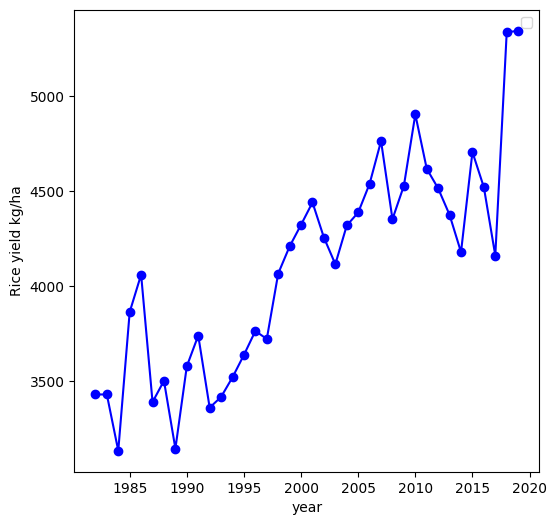

In [23]:
plt.figure(figsize=(6,6))
plt.scatter(df['year'], df['prod'],color='b')
plt.plot(df['year'],df['prod'],color='b')

plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()

In [24]:
#q90=df['prod'].quantile(0.90)
#q10=df['prod'].quantile(0.10)
#for ind in df.index:
 # if (df['prod'][ind]> q90 or df['prod'][ind]<q10):
    #drop the row
  #  print(df['prod'][ind])
    #df.drop(index=ind)

#print(df)

In [25]:

def bias_value(y_test, y_pred):
  ytest_list = list(y_test.values)
  diff=0.0
  avg_diff=0.0
  for i in range(0,len(ytest_list)):
    diff=diff+ytest_list[i]-y_pred[i]

  avg_diff=diff/len(ytest_list)
  return avg_diff

data = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RMSE train': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'RRMSE train': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'MAE train': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'R2_score train': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0],
        'Bias train': [0,0,0,0,0],
        }
test_acc = {'Method': ['Linear Regression','SVR','MLP','KNN','Random Forest'],
        'RMSE test': [0,0,0,0,0],
        'RRMSE test': [0,0,0,0,0],
        'MAE test': [0,0,0,0,0],
        'R2_score test': [0,0,0,0,0],
        'Bias test': [0,0,0,0,0]
        }

df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])

test_percentage = 0.3
test_size = math.floor(len(df.index)*test_percentage)


df_train = df[:-test_size]
df_test = df[-test_size:]


In [26]:
print(df_train)

    year        X1         X2         X3         X4    X5    X6    X7    X8  \
0   1982  412.1500  31.296769  33.744517  28.250000  70.0  37.0  17.0  73.0   
1   1983  613.0500  31.419266  34.424219  27.373323  59.4  49.0  13.0  72.0   
2   1984  367.6500  31.150382  33.730150  28.037500  61.0  49.0  13.0  73.0   
3   1985  503.3000  31.065134  33.907830  27.581667  77.0  30.0  17.0  72.0   
4   1986  337.2480  31.332796  33.763206  27.990476  78.0  35.0  11.0  63.0   
5   1987  500.5500  31.624293  33.809596  27.942857  61.0  49.0   9.4  72.0   
6   1988  508.8465  31.130494  33.782143  28.029708  86.0  20.0   9.4  72.0   
7   1989  550.4100  31.144239  33.769920  28.042391  86.0  20.0  14.0  70.0   
8   1990  555.6500  31.203888  33.917118  28.190323  85.0  22.0  17.0  68.0   
9   1991  452.3500  31.078533  34.094348  28.250375  75.0  28.0  21.0  66.0   
10  1992  406.1000  31.158680  33.554352  27.917376  83.0  20.0  25.0  71.0   
11  1993  647.3250  31.192561  33.788889  27.381481 

Feature: 1, Score: 0.04428
Feature: 2, Score: 0.24697
Feature: 3, Score: 0.07889
Feature: 4, Score: 0.04695
Feature: 5, Score: 0.04165
Feature: 6, Score: 0.08259
Feature: 7, Score: 0.07189
Feature: 8, Score: 0.11149
Feature: 9, Score: 0.13492
Feature: 10, Score: 0.09721
Feature: 11, Score: 0.04316


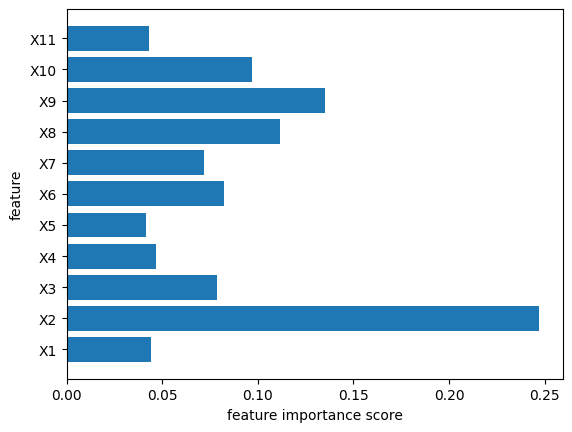

[[0, 0.04427949573902471], [1, 0.24697164161073462], [2, 0.07889207651688186], [3, 0.04694734038295871], [4, 0.04164955181157591], [5, 0.082590108755635], [6, 0.07189190711646067], [7, 0.11149172934653741], [8, 0.13491590520289737], [9, 0.09720895099347533], [10, 0.04316129252381834]]


In [27]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','prod'], axis=1)
y=df_train['prod']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an array 'arr' with the feature index
arr = [[0 for x in range(2)] for y in range(11)]
for i,v in enumerate(importance):
	arr[i][0] = i
	arr[i][1] = v
	print('Feature: %0d, Score: %.5f' % (i+1,v))
# plot feature importance
plt.barh([f'X{x}' for x in range(1,len(importance)+1)], importance)
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.show()

print(arr)


[[1, 0.24697164161073462], [8, 0.13491590520289737], [7, 0.11149172934653741], [9, 0.09720895099347533], [5, 0.082590108755635], [2, 0.07889207651688186], [6, 0.07189190711646067], [3, 0.04694734038295871], [0, 0.04427949573902471], [10, 0.04316129252381834], [4, 0.04164955181157591]]


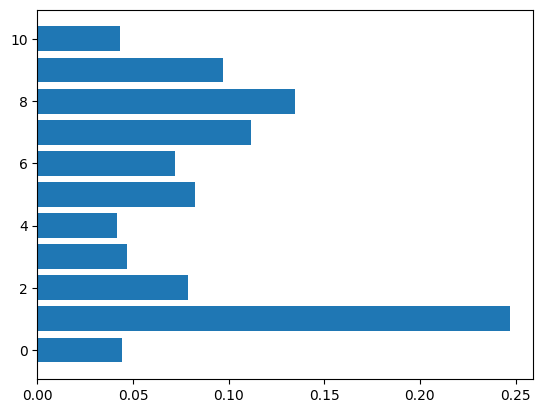

In [28]:
arr.sort(key=lambda row: (row[1]), reverse=True)
print(arr)
plt.barh([x[0] for x in arr],[x[1] for x in arr])
plt.show()


Feature: 5, Score: 0.04165
Feature: 11, Score: 0.04316
Feature: 1, Score: 0.04428
Feature: 4, Score: 0.04695
Feature: 7, Score: 0.07189
Feature: 3, Score: 0.07889
Feature: 6, Score: 0.08259
Feature: 10, Score: 0.09721
Feature: 8, Score: 0.11149
Feature: 9, Score: 0.13492
Feature: 2, Score: 0.24697


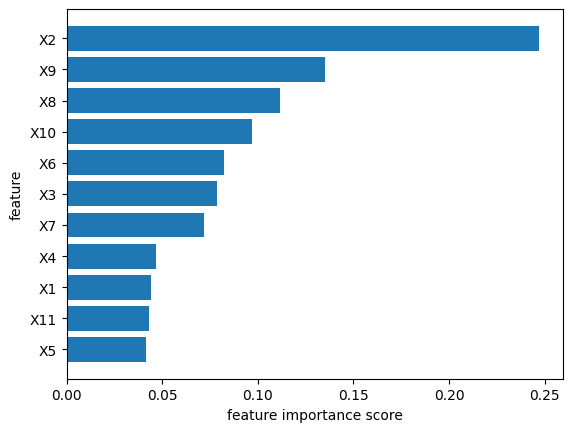

In [29]:

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFECV
import matplotlib.pyplot as plt

X=df_train.drop(['year','prod'], axis=1)
y=df_train['prod']
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

feature_names = [f"feature {i}" for i in range(X.shape[1])]

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
x_train = pd.DataFrame(X_train)
X_test = scaler.transform(x_test)
x_test = pd.DataFrame(X_test)

rf = RandomForestRegressor(random_state=42)

rf.fit(x_train,y_train)

importance = rf.feature_importances_
# summarize feature importance and assign them to an list 'list_' with the feature index
list_ = [[0 for x in range(2)] for y in range(11)]
dic = {}
indexes=[]
values=[]
for i,v in enumerate(importance):
	dic[i+1] = v

# plot feature importance
sorted_list = sorted(dic.items(), key=lambda x:x[1],reverse=False)

sorted_dic = dict()
for item in sorted_list:
	sorted_dic[item[0]]=item[1]
	indexes.append(item[0])
	values.append(item[1])
	print('Feature: %0d, Score: %.5f' % (item[0],item[1]))
plt.barh([f'X{x}' for x in indexes], [val for val in  values])
plt.xlabel("feature importance score")
plt.ylabel("feature")
plt.savefig("AM_features.jpg",dpi=1200)
plt.show()


In [30]:
acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)

for n in range(1,12):
  num_of_features = n
  #print(num_of_features)
  selected = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  print(selected)
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  print(selected_features_list)

[[1, 0.24697164161073462]]
['X2']
[[1, 0.24697164161073462], [8, 0.13491590520289737]]
['X2', 'X9']
[[1, 0.24697164161073462], [8, 0.13491590520289737], [7, 0.11149172934653741]]
['X2', 'X9', 'X8']
[[1, 0.24697164161073462], [8, 0.13491590520289737], [7, 0.11149172934653741], [9, 0.09720895099347533]]
['X2', 'X9', 'X8', 'X10']
[[1, 0.24697164161073462], [8, 0.13491590520289737], [7, 0.11149172934653741], [9, 0.09720895099347533], [5, 0.082590108755635]]
['X2', 'X9', 'X8', 'X10', 'X6']
[[1, 0.24697164161073462], [8, 0.13491590520289737], [7, 0.11149172934653741], [9, 0.09720895099347533], [5, 0.082590108755635], [2, 0.07889207651688186]]
['X2', 'X9', 'X8', 'X10', 'X6', 'X3']
[[1, 0.24697164161073462], [8, 0.13491590520289737], [7, 0.11149172934653741], [9, 0.09720895099347533], [5, 0.082590108755635], [2, 0.07889207651688186], [6, 0.07189190711646067]]
['X2', 'X9', 'X8', 'X10', 'X6', 'X3', 'X7']
[[1, 0.24697164161073462], [8, 0.13491590520289737], [7, 0.11149172934653741], [9, 0.0972089

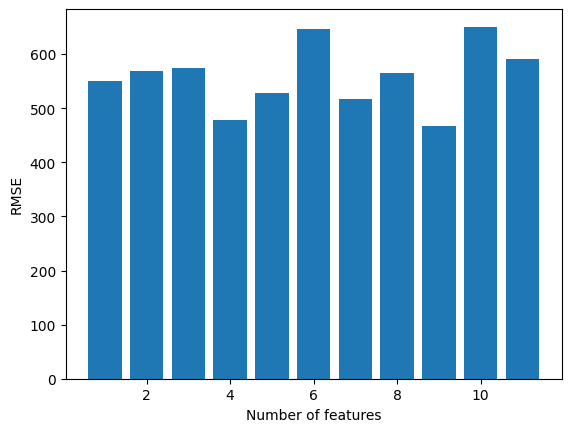

['X2', 'X9', 'X8', 'X10', 'X6', 'X3', 'X7', 'X4', 'X1']
467.40239999999994


In [31]:

acc_array=list()
#feature_array=list()


cv = KFold(n_splits=5, shuffle=True, random_state=42)
min=2000
selected_features_final=list()
for n in range(1,12):
  num_of_features = n
  selected = [[0 for x in range(2)] for y in range(num_of_features)]
  #copy the selected most important n features' indices and their importance to 'selected' array
  for i in range(num_of_features):
    selected[i] = sorted(arr,key=lambda row: (row[1]), reverse=True)[i]
  #assign selected feature columns in 'X' dataset to new dataset 'selected_features'
  selected_features = pd.DataFrame()
  selected_features_list = [0 for y in range(num_of_features)]
  for i in range(num_of_features):
    selected_features[i] = df_train.iloc[:, selected[i][0]+1]
    #print(selected_features)
    selected_features_list[i] = df_train.columns[selected[i][0]+1]
  #print(selected_features_list)
  rmse_test_arr = []
  rrmse_test_arr =[]
  r2_test_arr= []
  mae_test_arr = []

  rmse_train_arr = []
  rrmse_train_arr =[]
  r2_train_arr= []
  mae_train_arr = []

  bias_test_arr = []
  bias_train_arr = []
  #print(selected_features[i])
  for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = selected_features[i].iloc[tr], selected_features[i].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    #print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

  acc_array.append(np.mean(np.array(rmse_test_arr).astype(np.float64)))
  if(min > np.mean(np.array(rmse_test_arr).astype(np.float64))):
    min=np.mean(np.array(rmse_test_arr).astype(np.float64))
    selected_features_final = selected_features_list
plt.bar(np.arange(1,12), acc_array)
plt.xlabel("Number of features")
plt.ylabel("RMSE")
plt.show()
print(selected_features_final)
print(min)

##LinearRegression

[ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26] [ 0  8  9 11 13 21]
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26] [ 1  4 12 16 17 24]
[ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26] [ 2  3  5 15 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24] [18 20 23 25 26]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26] [ 6  7 10 14 19]
[784.012, 736.743, 888.464, 740.022, 461.056]
722.0594


<BarContainer object of 5 artists>

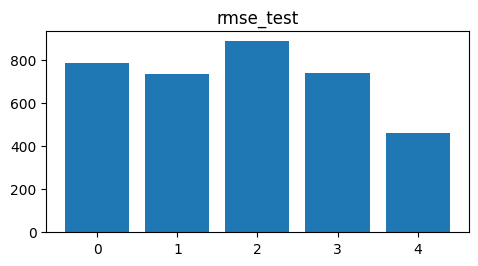

In [32]:
cv = KFold(n_splits=5, shuffle=True,random_state=42)

rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = LinearRegression().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)

    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][0]='Linear Regression'
data['RMSE test'][0]=np.mean(rmse_test_arr)
data['RMSE train'][0]=np.mean(rmse_train_arr)
data['RRMSE test'][0]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][0]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][0]=np.mean(mae_test_arr)
data['MAE train'][0]=np.mean(mae_train_arr)
data['R2_score test'][0]=np.mean(r2_test_arr)
data['R2_score train'][0]=np.mean(r2_train_arr)
data['Bias test'][0]=np.mean(bias_test_arr)
data['Bias train'][0]=np.mean(bias_train_arr)

#print(np.array(rmse_test_arr).astype(np.float64))
print(rmse_test_arr)
print(sum(rmse_test_arr)/5)
plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

[0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26] [6, 7, 10, 14, 19]

RMSE test:  635.325

RRMSE test:  13.65 %


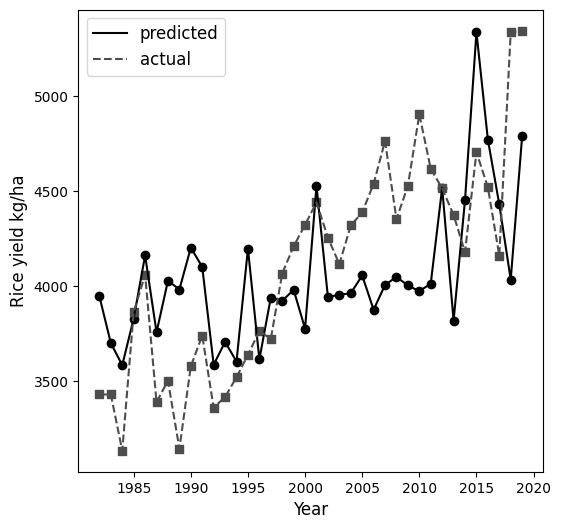

In [33]:

tr = [ 0,  1,  2,  3,  4,  5,  8,  9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26]
tt = [ 6, 7, 10, 14, 19]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = LinearRegression().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')

print("\nRRMSE test: ", rrmse_test,"%")


x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='k')
plt.plot(df['year'],y__pred__,color='k',label='predicted')
plt.scatter(df['year'],y__,color='0.3', marker='s')
plt.plot(df['year'],y__,color='0.3',label='actual',linestyle='dashed')

plt.legend(fontsize='12')
plt.xlabel('Year',fontsize=12)
plt.ylabel('Rice yield kg/ha',fontsize=12)
plt.savefig("Anu_LR_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][0]='Linear Regression'
test_acc['RMSE test'][0]=rmse_test
test_acc['RRMSE test'][0]=rrmse_test
test_acc['MAE test'][0]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][0]=r2_score(y_,y_pred_)
test_acc['Bias test'][0]=bias_value(y_,y_pred_)

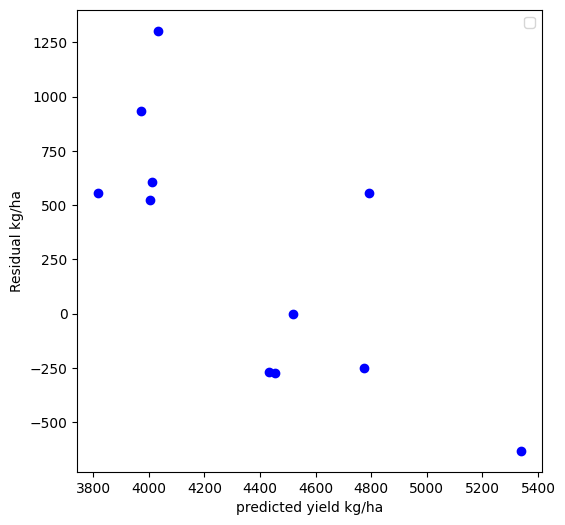

In [34]:
x_val = df_test[selected_features_final]
y_val = df_test['prod']
y_pred_val = model.predict(scaler.transform(x_val))

plt.figure(figsize=(6,6))
plt.scatter(y_pred_val, y_val-y_pred_val, color='b')
#plt.plot(df_test['year'], y_-y_pred_,color='b')
plt.xlabel("predicted yield kg/ha")
plt.ylabel("Residual kg/ha")
plt.legend()
plt.savefig("Anu_LR_res.jpg",dpi=1200)

plt.show()

##SVR

[ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26] [ 0  8  9 11 13 21]
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26] [ 1  4 12 16 17 24]
[ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26] [ 2  3  5 15 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24] [18 20 23 25 26]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26] [ 6  7 10 14 19]


<BarContainer object of 5 artists>

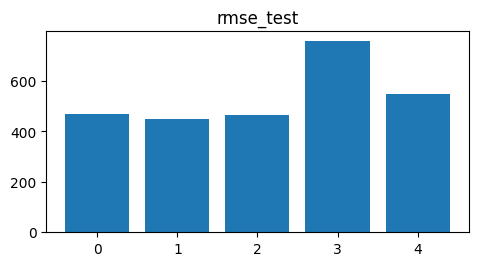

In [35]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = SVR().fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][1]='SVR'
data['RMSE test'][1]=np.mean(rmse_test_arr)
data['RMSE train'][1]=np.mean(rmse_train_arr)
data['RRMSE test'][1]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][1]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][1]=np.mean(mae_test_arr)
data['MAE train'][1]=np.mean(mae_train_arr)
data['R2_score test'][1]=np.mean(r2_test_arr)
data['R2_score train'][1]=np.mean(r2_train_arr)
data['Bias test'][1]=np.mean(bias_test_arr)
data['Bias train'][1]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



In [36]:
tr = [ 0 , 1 , 4, 6,  7,  8,  9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26]
tt = [ 2 , 3 , 5, 15, 22]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = SVR().fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")


test_acc['Method'][1]='SVR'
test_acc['RMSE test'][1]=rmse_test
test_acc['RRMSE test'][1]=rrmse_test
test_acc['MAE test'][1]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][1]=r2_score(y_,y_pred_)
test_acc['Bias test'][1]=bias_value(y_,y_pred_)

[0, 1, 4, 6, 7, 8, 9, 10, 11, 12, 13, 14, 16, 17, 18, 19, 20, 21, 23, 24, 25, 26] [2, 3, 5, 15, 22]

RMSE test:  835.449

RRMSE test:  17.95 %


##MLP

[ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26] [ 0  8  9 11 13 21]
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26] [ 1  4 12 16 17 24]
[ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26] [ 2  3  5 15 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24] [18 20 23 25 26]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26] [ 6  7 10 14 19]


<BarContainer object of 5 artists>

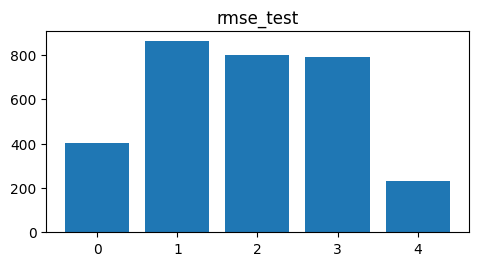

In [37]:

cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []


for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    scaler = MinMaxScaler()
    print(tr,tt)
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)
    model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][2]='MLP'
data['RMSE test'][2]=np.mean(rmse_test_arr)
data['RMSE train'][2]=np.mean(rmse_train_arr)
data['RRMSE test'][2]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][2]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][2]=np.mean(mae_test_arr)
data['MAE train'][2]=np.mean(mae_train_arr)
data['R2_score test'][2]=np.mean(r2_test_arr)
data['R2_score train'][2]=np.mean(r2_train_arr)
data['Bias test'][2]=np.mean(bias_test_arr)
data['Bias train'][2]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26] [6, 7, 10, 14, 19]

RMSE test:  1092.065

RRMSE test:  23.46 %


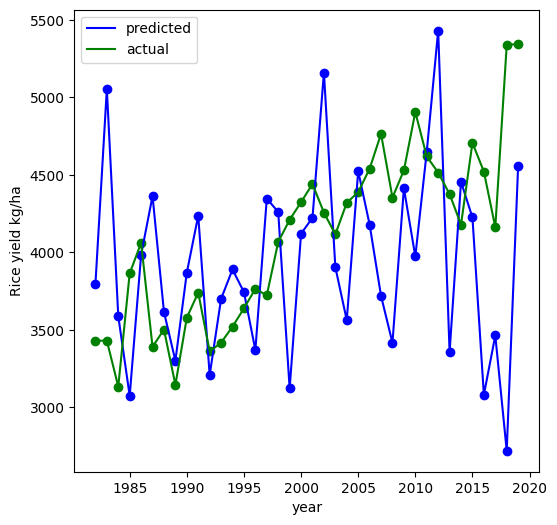

In [38]:
tr = [ 0,  1,  2,  3,  4,  5,  8,  9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26]
tt = [ 6, 7, 10, 14, 19]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model = MLPRegressor(hidden_layer_sizes=(64,64,64),activation="relu" ,random_state=1, max_iter=2000).fit(X_train, y_train)

x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.show()

test_acc['Method'][2]='MLP'
test_acc['RMSE test'][2]=rmse_test
test_acc['RRMSE test'][2]=rrmse_test
test_acc['MAE test'][2]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][2]=r2_score(y_,y_pred_)
test_acc['Bias test'][2]=bias_value(y_,y_pred_)

##KNN

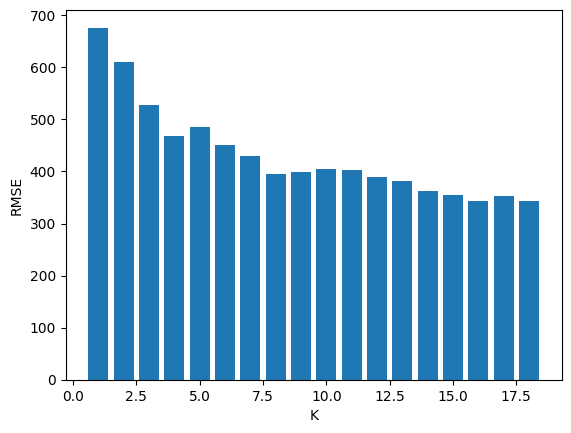

18


In [39]:
X=df_train[selected_features_final]
y=df_train['prod']

x_train, x_test, y_train, y_test= train_test_split(X,y,test_size=0.3,random_state=42)

scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
K_min = 0
RMSE_min=math.inf
RMSE_list=[0 for t in range(len(x_train))]

for K in range(1,len(x_train)+1):
    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    rmse_test = float(format(np.sqrt(mean_squared_error(y_pred, y_test)), '.3f'))

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    RMSE_list[K-1]=rmse_test
    if RMSE_min > rmse_test:
      RMSE_min = rmse_test
      K_min = K
plt.bar(np.arange(1,len(x_train)+1), RMSE_list)
plt.xlabel("K")
plt.ylabel("RMSE")
plt.show()

print(K_min)

[ 0  8  9 11 13 21] [ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26]
[ 1  4 12 16 17 24] [ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26]
[ 2  3  5 15 22] [ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26]
[18 20 23 25 26] [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24]
[ 6  7 10 14 19] [ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26]


<BarContainer object of 5 artists>

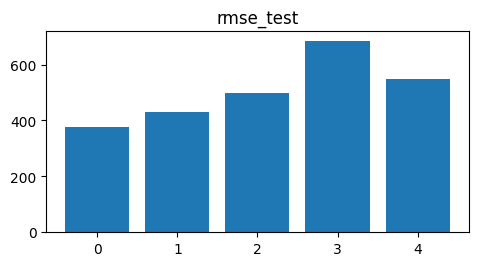

In [40]:


cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

K = K_min
for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tt,tr)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(x_train)
    X_test = scaler.transform(x_test)

    model = neighbors.KNeighborsRegressor(n_neighbors = K).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

                #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][3]='KNN'
data['RMSE test'][3]=np.mean(rmse_test_arr)
data['RMSE train'][3]=np.mean(rmse_train_arr)
data['RRMSE test'][3]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][3]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][3]=np.mean(mae_test_arr)
data['MAE train'][3]=np.mean(mae_train_arr)
data['R2_score test'][3]=np.mean(r2_test_arr)
data['R2_score train'][3]=np.mean(r2_train_arr)
data['Bias test'][3]=np.mean(bias_test_arr)
data['Bias train'][3]=np.mean(bias_train_arr)

plt.figure(figsize=(12,12))
plt.subplot(4, 2, 1)
plt.title("rmse_test")
plt.bar([x for x in [0,1,2,3,4]],[rmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 2)
# plt.title("rmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 3)
# plt.title("rrmse_test")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 4)
# plt.title("rrmse_train")
# plt.bar([x for x in [0,1,2,3,4]],[rrmse_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 5)
# plt.title("r2_test")
# plt.bar([x for x in [0,1,2,3,4]],[r2_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 6)
# plt.title("r2_train")
# plt.bar([x for x in [0,1,2,3,4]],[r2_train_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 7)
# plt.title("mae_test")
# plt.bar([x for x in [0,1,2,3,4]],[mae_test_arr[x] for x in [0,1,2,3,4]])

# plt.subplot(4, 2, 8)
# plt.title("mae_train")
# plt.bar([x for x in [0,1,2,3,4]],[mae_train_arr[x] for x in [0,1,2,3,4]])
# plt.show()



[1, 2, 3, 4, 5, 6, 7, 10, 12, 14, 15, 16, 17, 18, 19, 20, 22, 23, 24, 25, 26] [0, 8, 9, 11, 13, 21]

RMSE test:  783.626

RRMSE test:  16.84 %


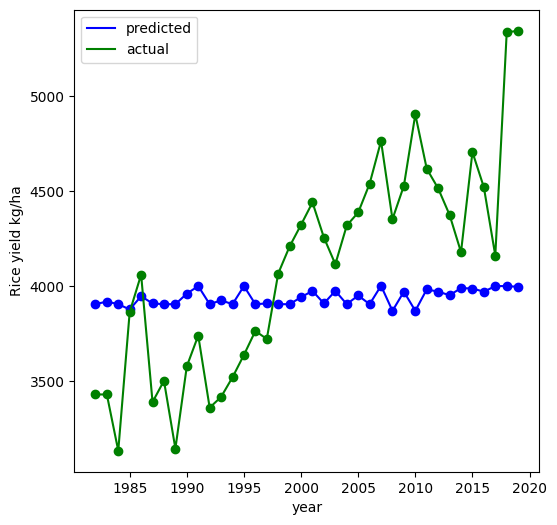

In [41]:
tr = [ 1,2,3,4,5, 6, 7, 10, 12,14,15,16,17,18,19,20,22,23, 24, 25,26]
tt = [ 0,8,9,11,13,21]
x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)

model = neighbors.KNeighborsRegressor(n_neighbors = K_min).fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")
x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_KNN_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][3]='KNN'
test_acc['RMSE test'][3]=rmse_test
test_acc['RRMSE test'][3]=rrmse_test
test_acc['MAE test'][3]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][3]=r2_score(y_,y_pred_)
test_acc['Bias test'][3]=bias_value(y_,y_pred_)



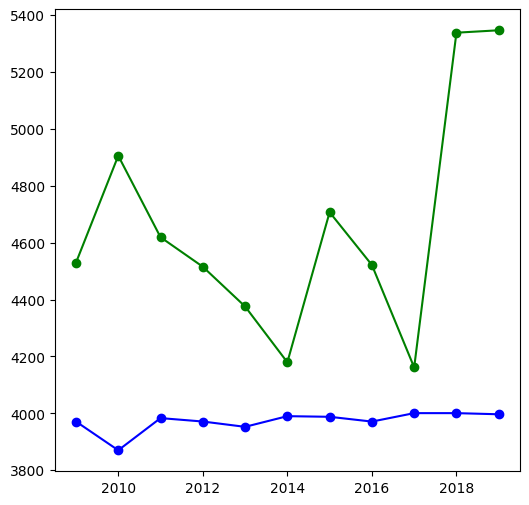

In [42]:

plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='b')
plt.plot(df_test['year'],y_pred_,color='b')
plt.scatter(df_test['year'],y_,color='g')
plt.plot(df_test['year'],y_,color='g')
plt.savefig("AM_KNN_pred.jpg",dpi=1200)
plt.show()


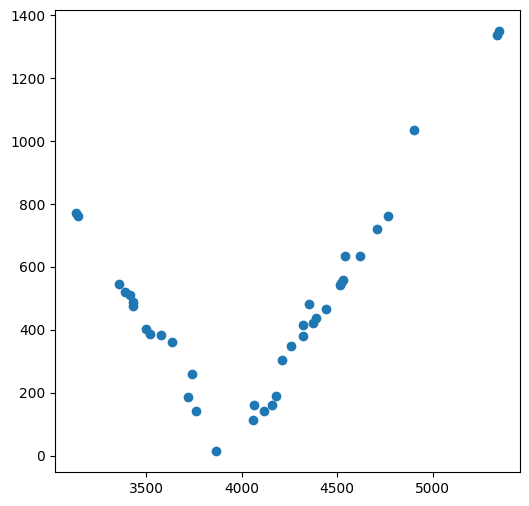

In [43]:
plt.figure(figsize=(6,6))
plt.scatter(y__,np.abs(y__-y__pred__))
plt.show()

##Random Forest

In [44]:
cv = KFold(n_splits=5, shuffle=True, random_state=42)

# Iterate through CV splits
rmse_test_arr = []
rrmse_test_arr =[]
r2_test_arr= []
mae_test_arr = []

rmse_train_arr = []
rrmse_train_arr =[]
r2_train_arr= []
mae_train_arr = []

bias_test_arr = []
bias_train_arr = []

for tr, tt in cv.split(df_train): #tr,tt are indexes
    x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
    y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
    print(tr,tt)
    scaler = MinMaxScaler()
    X_train = scaler.fit_transform(pd.DataFrame(x_train))
    X_test = scaler.transform(pd.DataFrame(x_test))
    model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
    y_pred= model.predict(X_test)
    y_pred_train= model.predict(X_train)

    r2_test=r2_score(y_test,y_pred)
    r2_train=r2_score(y_train,y_pred_train)
    #print(r2_test)
    #print(r2_train)
    r2_test_arr.append(r2_test)
    r2_train_arr.append(r2_train)

    rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
    #print("\nRMSE test: ", rmse_test)
    rmse_test_arr.append(rmse_test)

    rrmse_test = format(float(rmse_test*100/np.mean(y_test)),'.2f')
    #print("\nRRMSE test: ", rrmse_test,"%")
    rrmse_test_arr.append(rrmse_test)

    rmse_train = float(format(np.sqrt(mean_squared_error(y_train, y_pred_train)), '.3f'))
    #print("\nRMSE train: ", rmse_train)
    rmse_train_arr.append(rmse_train)

    rrmse_train = format(float(rmse_train*100/np.mean(y_train)),'.2f')
    #print("\nRRMSE train: ", rrmse_train,"%")
    rrmse_train_arr.append(rrmse_train)


    mae_test = float(format(mean_absolute_error(y_test, y_pred), '.3f'))
    #print("\nMAE Test: ", mae_test)
    mae_test_arr.append(mae_test)
    mae_train = float(format(mean_absolute_error(y_train, y_pred_train), '.3f'))
    #print("\nMAE Train: ", mae_train)
    mae_train_arr.append(mae_train)

    #print("\nBias Test: \n", bias_value(y_test,y_pred))
    bias_test_arr.append(bias_value(y_test,y_pred))
    #print("\nBias Train: \n", bias_value(y_train, y_pred_train))
    bias_train_arr.append(bias_value(y_train, y_pred_train))

data['Method'][4]='Random Forest'
data['RMSE test'][4]=np.mean(rmse_test_arr)
data['RMSE train'][4]=np.mean(rmse_train_arr)
data['RRMSE test'][4]=np.mean(np.array(rrmse_test_arr).astype(np.float64))
data['RRMSE train'][4]=np.mean(np.array(rrmse_train_arr).astype(np.float64))
data['MAE test'][4]=np.mean(mae_test_arr)
data['MAE train'][4]=np.mean(mae_train_arr)
data['R2_score test'][4]=np.mean(r2_test_arr)
data['R2_score train'][4]=np.mean(r2_train_arr)
data['Bias test'][4]=np.mean(bias_test_arr)
data['Bias train'][4]=np.mean(bias_train_arr)

print(np.array(rmse_test_arr).astype(np.float64))
print(sum(np.array(rmse_test_arr))/5)
x_train, x_test = df_train[selected_features_final], df_test[selected_features_final]
y_train, y_test = df_train['prod'], df_test['prod']

X_train = scaler.fit_transform(pd.DataFrame(x_train))
X_test = scaler.transform(pd.DataFrame(x_test))
#model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
y_pred= model.predict(X_test)
rmse_test = float(format(np.sqrt(mean_squared_error(y_test, y_pred)), '.3f'))
print(rmse_test)

[ 1  2  3  4  5  6  7 10 12 14 15 16 17 18 19 20 22 23 24 25 26] [ 0  8  9 11 13 21]
[ 0  2  3  5  6  7  8  9 10 11 13 14 15 18 19 20 21 22 23 25 26] [ 1  4 12 16 17 24]
[ 0  1  4  6  7  8  9 10 11 12 13 14 16 17 18 19 20 21 23 24 25 26] [ 2  3  5 15 22]
[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 19 21 22 24] [18 20 23 25 26]
[ 0  1  2  3  4  5  8  9 11 12 13 15 16 17 18 20 21 22 23 24 25 26] [ 6  7 10 14 19]
[510.782 566.541 528.571 660.873 431.831]
539.7196000000001
846.5


[0, 1, 2, 3, 4, 5, 8, 9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26] [6, 7, 10, 14, 19]

RMSE test:  846.5

RRMSE test:  18.19 %


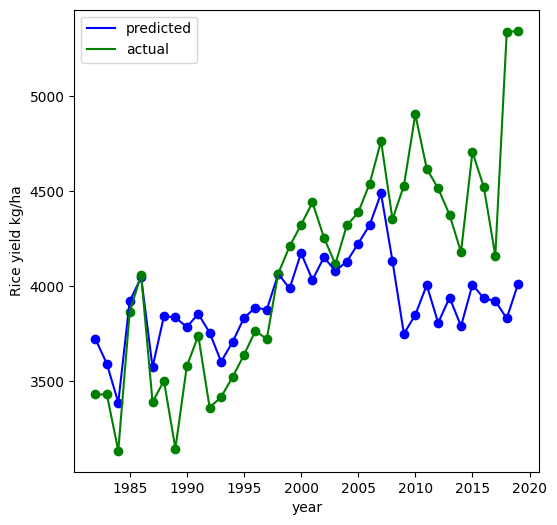

In [45]:
tr = [ 0,  1,  2,  3,  4,  5,  8,  9, 11, 12, 13, 15, 16, 17, 18, 20, 21, 22, 23, 24, 25, 26]
tt = [ 6, 7, 10, 14, 19]

x_train, x_test = df_train[selected_features_final].iloc[tr], df_train[selected_features_final].iloc[tt]
y_train, y_test = df_train['prod'].iloc[tr], df_train['prod'].iloc[tt]
print(tr,tt)
scaler = MinMaxScaler()
X_train = scaler.fit_transform(x_train)
X_test = scaler.transform(x_test)
model =  RandomForestRegressor(n_estimators = 1000, random_state = 42).fit(X_train, y_train)
x_ = df_test[selected_features_final]
y_ = df_test['prod']
y_pred_ = model.predict(scaler.transform(x_))

rmse_test = float(format(np.sqrt(mean_squared_error(y_pred_, y_)), '.3f'))
print("\nRMSE test: ", rmse_test)

rrmse_test = format(float(rmse_test*100/np.mean(y_)),'.2f')
print("\nRRMSE test: ", rrmse_test,"%")

x__=df[selected_features_final]
y__=df['prod']
y__pred__=model.predict(scaler.transform(x__))

plt.figure(figsize=(6,6))
plt.scatter(df['year'], y__pred__,color='b')
plt.plot(df['year'],y__pred__,color='b',label='predicted')
plt.scatter(df['year'],y__,color='g')
plt.plot(df['year'],y__,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_RF_full.jpg",dpi=1200)
plt.show()

test_acc['Method'][4]='RF'
test_acc['RMSE test'][4]=rmse_test
test_acc['RRMSE test'][4]=rrmse_test
test_acc['MAE test'][4]=float(format(mean_absolute_error(y_pred_, y_), '.3f'))
test_acc['R2_score test'][4]=r2_score(y_,y_pred_)
test_acc['Bias test'][4]=bias_value(y_,y_pred_)

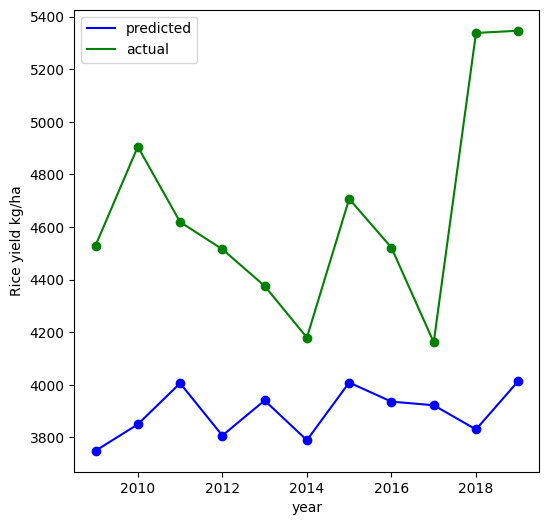

In [46]:
plt.figure(figsize=(6,6))
plt.scatter(df_test['year'], y_pred_,color='b')
plt.plot(df_test['year'],y_pred_,color='b',label='predicted')
plt.scatter(df_test['year'],y_,color='g')
plt.plot(df_test['year'],y_,color='g',label='actual')
plt.xlabel("year")
plt.ylabel("Rice yield kg/ha")
plt.legend()
plt.savefig("AM_RF_pred.jpg",dpi=1200)

plt.show()

# Results

In [47]:
df_train = pd.DataFrame(data, columns = ['Method', 'RMSE test','RMSE train','RRMSE test','RRMSE train','MAE test','MAE train','R2_score test','R2_score train','Bias test','Bias train'])
print("dataset: ", dataset)
print("test size : ",test_size,",", test_size*100/len(df.index),"%")
print(df_train)

dataset:  Anuradhapura full dataset
test size :  11 , 28.94736842105263 %
              Method  RMSE test  RMSE train  RRMSE test  RRMSE train  \
0  Linear Regression   722.0594    350.6932      18.706        9.058   
1                SVR   539.1830    451.4226      13.830       11.662   
2                MLP   617.3936    629.4196      15.736       16.254   
3                KNN   507.9222    438.4906      13.050       11.328   
4      Random Forest   539.7196    167.2872      13.882        4.322   

   MAE test  MAE train  R2_score test  R2_score train   Bias test  \
0  632.1604   279.5258      -6.518458        0.369719 -151.618673   
1  494.5742   388.2642      -4.223332       -0.028119    3.006293   
2  528.8196   495.3412      -5.310374       -1.025669  -61.811073   
3  466.6408   389.1994      -3.280802        0.027680   -7.220370   
4  481.7680   142.6690      -3.615731        0.856521  -31.941957   

     Bias train  
0 -1.441018e-13  
1 -1.180217e+00  
2 -6.862497e+01  
3 -1.8

In [48]:
test_acc_df = pd.DataFrame(test_acc, columns = ['Method', 'RMSE test','RRMSE test','MAE test', 'R2_score test','Bias test'])
print(test_acc_df)

              Method  RMSE test RRMSE test  MAE test  R2_score test  \
0  Linear Regression    635.325      13.65   537.267      -1.754193   
1                SVR    835.449      17.95   742.486      -3.762588   
2                MLP   1092.065      23.46   847.119      -7.137663   
3                KNN    783.626      16.84   682.121      -3.190057   
4                 RF    846.500      18.19   758.921      -3.889417   

    Bias test  
0  277.162819  
1  742.485730  
2  624.975094  
3  682.120720  
4  758.920872  


In [50]:
df_train.to_csv(r'AT_feature_engineered_train.csv', index = False, header=True)
test_acc_df.to_csv(r'AT_feature_engineered_test.csv',index=False, header=True)